**Lab 5 - LSTM for Text Classification**

**1. Getting the Dataset**

In [1]:
import keras
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential

from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import vis_utils

from pandas import DataFrame

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
imdb = keras.datasets.imdb

# loading only the top 10000 words in the vocabulary like you did last week.
VOCAB_SIZE = 10000
# we reserve indices 0 for ‘<PAD>’, 1 for ‘<START>’ and 2 for ‘<UNK>’ i.e. words not in vocabulary
INDEX_FROM = 2 # EDITED
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=VOCAB_SIZE,
index_from=INDEX_FROM)

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
# Sanity check:
# Each instance in the training data is a list of word indices representing the words in the review
print('Sample review:', train_data[0])
# and each label is 1 if that review is positive, else 0
print('\n Sample label:', test_labels[1])

Sample review: [1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]

 Sample label: 1


**2. Readying the Inputs for the LSTM**

In [0]:
# Using pad_sequences from keras.preprocessing.sequence, pad the train and test data.
from keras.preprocessing.sequence import pad_sequences
MAXIMUM_LENGTH = 500

# Pre-process the train and test data by padding the sequences
preprocessed_train_data = pad_sequences(train_data, MAXIMUM_LENGTH)
preprocessed_test_data = pad_sequences(test_data, MAXIMUM_LENGTH)

In [5]:
# Sanity Check
print('Length of sample train_data before preprocessing:', len(train_data[0]))
print('Length of sample train_data after preprocessing:', len(preprocessed_train_data[0]))

Length of sample train_data before preprocessing: 218
Length of sample train_data after preprocessing: 500


**3. Building the Model**

In [6]:
# Create LSTM based model
EMBED_SIZE = 100

model = Sequential()
model.add(Embedding(input_dim=VOCAB_SIZE, input_length=MAXIMUM_LENGTH, output_dim=EMBED_SIZE))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# view model summary
model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


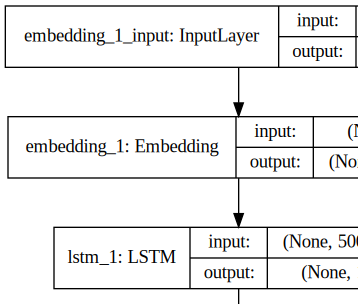

In [7]:
SVG(vis_utils.model_to_dot(
model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

**4. Training the Model**

In [8]:
# split the training data into training and validation data. You can use 2000 samples for validation and the rest for training

validation_data = preprocessed_train_data[:2000]
validation_labels = train_labels[:2000]

training_data = preprocessed_train_data[2000:]
training_labels = train_labels[2000:]

history = model.fit(training_data,
                    training_labels,
                    epochs=3,
                    batch_size=100,
                    validation_data=(validation_data, validation_labels),
                    verbose=1)




Train on 23000 samples, validate on 2000 samples
Epoch 1/3





23000/23000 [==============================] - 182s 8ms/step - loss: 0.5074 - acc: 0.7544 - val_loss: 0.3445 - val_acc: 0.8580
Epoch 2/3
23000/23000 [==============================] - 170s 7ms/step - loss: 0.2849 - acc: 0.8873 - val_loss: 0.3075 - val_acc: 0.8715
Epoch 3/3
23000/23000 [==============================] - 168s 7ms/step - loss: 0.2133 - acc: 0.9213 - val_loss: 0.3171 - val_acc: 0.8725


**Plot the Training & Validation Accuracy**

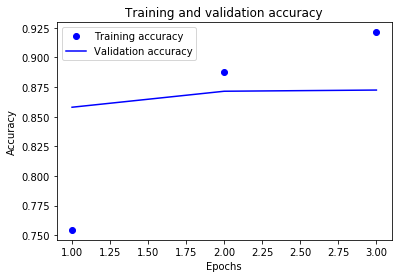

In [9]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**5. Evaluating the Model on the Test Dat**

In [10]:
# Preparing the test data and evaluating the model
test_data = pad_sequences(test_data, MAXIMUM_LENGTH)

results = model.evaluate(test_data, test_labels)

print('Test_loss:', results[0], 'Test_accuracy:', results[1])

25000/25000 [==============================] - 199s 8ms/step
Test_loss: 0.34017756673812866 Test_accuracy: 0.85548


**6. Extracting the Word Embeddings**

In [11]:
# Get the word embeddings and show their shape
word_embeddings = model.get_layer('embedding_1').get_weights()[0]
print('Shape of word_embeddings:', word_embeddings.shape)

print(model.summary())

Shape of word_embeddings: (10000, 100)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


**7. Visualizing the Reviews**

In [12]:
word2idx = imdb.get_word_index()
# 9998 since we only used top 1000 words of including ‘<PAD>’, ‘<START>’ and ‘<UNK>’
word2idx = {k:(v+INDEX_FROM) for k,v in word2idx.items() if v < 9998}
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] = 2

# In the next line, create the idx2word map for all the words in the dataset
idx2word = {v:k for k,v in word2idx.items()}

# View a sample review text using the lines of code below:
print(' '.join(idx2word[idx] for idx in train_data[0]))

1646592/1641221 [==============================] - 0s 0us/step
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole fi

In [13]:
# view the corresponding data
print(train_data[0])

[1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]


**8. Visualizing the Word_Embeddings**

In [14]:
print(pd.DataFrame(word_embeddings, index=idx2word.values()).head(10))


                 0         1         2   ...        97        98        99
woods      0.036970 -0.040755  0.046458  ... -0.039630  0.010691 -0.005480
hanging    0.034481 -0.014463 -0.023438  ... -0.023953 -0.002324 -0.049854
woody      0.003972  0.003017 -0.026078  ...  0.000720 -0.013717  0.021757
arranged  -0.040345 -0.035605  0.013405  ... -0.005269  0.003635 -0.001099
bringing  -0.020066 -0.023747  0.031140  ...  0.033174 -0.005584 -0.019402
wooden     0.013744  0.044890  0.018221  ... -0.044328  0.010928  0.017042
errors    -0.038434  0.033166  0.052815  ... -0.033909 -0.018686  0.026974
dialogs    0.018987  0.051478 -0.021548  ...  0.019731 -0.022677 -0.041932
kids       0.004468 -0.054481  0.027792  ...  0.010589  0.019741 -0.013549
uplifting -0.027957 -0.010216  0.033519  ... -0.028819  0.047909 -0.015226

[10 rows x 100 columns]


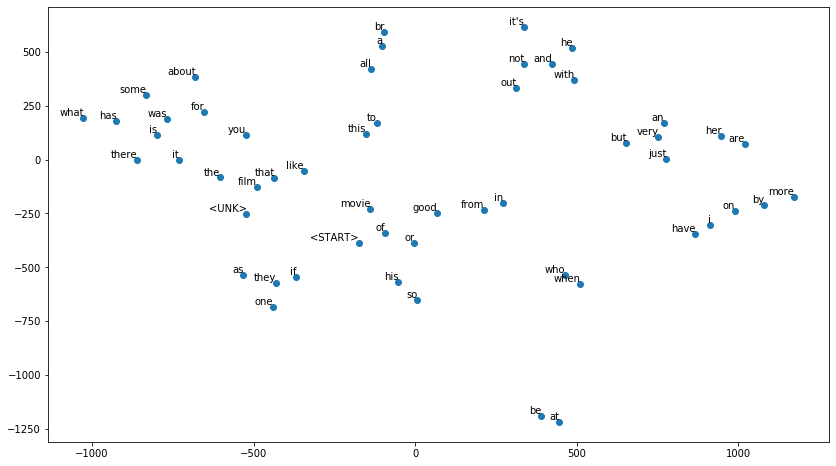

In [15]:
# Ploting the word embeddings using TSNE
tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
start = 3
plot_only = 54

T = tsne.fit_transform(word_embeddings[:plot_only, :])
labels = [idx2word[i+1] for i in range(plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right',
va='bottom')

**9. Questions**

1. Create a new model that is a copy of the model step 3. To this new model, add two dropout
layers, one between the embedding layer and the LSTM layer and another between the
LSTM layer and the output layer. Repeat steps 4 and 5 for this model. What do you observe?
How about if you train this new model for 6 epochs instead?
2. Experiment with compiling the model with batch sizes of 1, 32, len(training_data). What do
you observe?
3. (optional) Can you retrain with a Bidirectional LSTM instead of an LSTM? What do you
observe about the Bi-LSTM model at 3 epochs? What about at 6 epochs?

In [16]:
# Create LSTM based model
EMBED_SIZE = 100
model2 = Sequential()
model2.add(Embedding(VOCAB_SIZE, EMBED_SIZE,input_length=MAXIMUM_LENGTH))
model2.add(Dropout(0.2))
model2.add(LSTM(100))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
____________________________________________________________

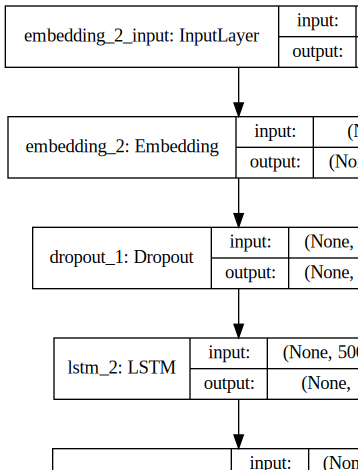

In [19]:
# Visualise the model another way
SVG(vis_utils.model_to_dot(
model2, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [21]:

history = model.fit(training_data,
                    training_labels,
                    epochs=3,
                    batch_size=100,
                    validation_data=(validation_data, validation_labels),
                    verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 175s 8ms/step - loss: 0.1650 - acc: 0.9420 - val_loss: 0.3377 - val_acc: 0.8615
Epoch 2/3
23000/23000 [==============================] - 176s 8ms/step - loss: 0.1321 - acc: 0.9538 - val_loss: 0.3594 - val_acc: 0.8800
Epoch 3/3
23000/23000 [==============================] - 174s 8ms/step - loss: 0.1000 - acc: 0.9669 - val_loss: 0.4022 - val_acc: 0.8675


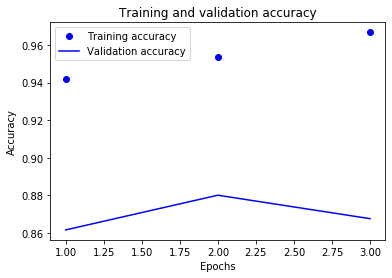

In [22]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
results2 = model2.evaluate(test_data, test_labels)
print('test_loss:', results2[0], 'test_accuracy:', results2[1])

25000/25000 [==============================] - 213s 9ms/step
test_loss: 0.6929055417633057 test_accuracy: 0.52052
